# _RecoGym_: IPS vs Non-IPS

In this notebook you shall find comparision of performance of two _`Agents`_:
* _Logistic Regression_ _**without**_ IPS; _**ref.:**_ [Likelihood Agents.ipynb](Likelihood%20Agents.ipynb)
* _Logistic Regression_ _**with**_ IPS; _**ref.:**_ [Inverse Propensity Score](Inverse%20Propensity%20Score.ipynb).

In all cases, an training data will be used as a _Random_ _`Agent`_ has been applied in the _`Environment`_.

In [1]:
import gym
import matplotlib.pyplot as plt

%matplotlib notebook
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [6, 3]

from reco_gym import build_agent_init, env_1_args, gather_agent_stats, plot_agent_stats

RandomSeed = 42

TrainingDataSamples = (100, 500, 1000, 2000, 3000, 5000, 8000, 10000, 13000, 14000, 15000)
TestingDataSamples = 15000
StatEpochs = 10
StatEpochsNewRandomSeed = True

std_env_args = {
    **env_1_args,
    'random_seed': RandomSeed,
}

env = gym.make('reco-gym-v1')

## _Uniform_ Data Set

In this experiment, we will use a uniform data set obtained after applying so called _Random_ _`Agent`_ i.e. the _`Agent`_ that randomply selects a _`Product`_.

Data uniformity means that _Propensity Score_ is _**always**_ the same. In case of _10_ _`Products`_ $PS=\frac{1}{10}=0.1$.

Import _`Agents`_.

In [2]:
from agents import LogregPolyAgent, logreg_poly_args
from agents import LogregMulticlassIpsAgent, logreg_multiclass_ips_args

In [3]:
agent_inits = {
    **build_agent_init(
        'LogReg Poly IPS',
        LogregPolyAgent,
        {
            **logreg_poly_args,
            'with_ips': True,
        }
    ),
    **build_agent_init(
        'LogReg MC IPS',
        LogregMulticlassIpsAgent,
        {
            **logreg_multiclass_ips_args,
            'with_ips': False,
        }
    ),
    **build_agent_init(
        'LogReg Poly Non-IPS',
        LogregPolyAgent,
        {
            **logreg_poly_args,
            'with_ips': False,
        }
    ),
}

Gathering statistics...

In [4]:
agent_stats01 = gather_agent_stats(
    env,
    std_env_args,
    {
        'num_products': 10,
        'number_of_flips': 5,
    },
    agent_inits,
    TrainingDataSamples,
    TestingDataSamples,
    StatEpochs,
    StatEpochsNewRandomSeed
)

Agent: LogReg Poly IPS
Start: Num of Offline Users: 100
Start: Agent Training #1
Start: Agent Training #5
Start: Agent Training #2
Start: Agent Training #3
Start: Agent Training #0
Start: Agent Training #7
Start: Agent Training #4
Start: Agent Training #6
Start: Agent Training #8
Start: Agent Training #9
Start: Agent Testing #4
Start: Agent Testing #2
Start: Agent Testing #8
Start: Agent Testing #3
Start: Agent Testing #9
Start: Agent Testing #5
Start: Agent Testing #0
Start: Agent Testing #7
Start: Agent Testing #6
Start: Agent Testing #1
End: Agent Testing #3 (1792.5315375328064s)
End: Agent Testing #8 (1807.6476485729218s)
End: Agent Testing #0 (1810.1388092041016s)
End: Agent Testing #6 (1829.7977511882782s)
End: Agent Testing #2 (1839.7453920841217s)
End: Agent Testing #9 (1846.4114699363708s)
End: Agent Testing #4 (1858.7002708911896s)
End: Agent Testing #1 (1888.3107557296753s)
End: Agent Testing #7 (1908.288316488266s)
End: Agent Testing #5 (1939.469671010971s)
End: Num of Offl

Start: Agent Training #7
Start: Agent Training #6
Start: Agent Training #2
Start: Agent Training #5
Start: Agent Training #8
Start: Agent Training #3
Start: Agent Training #4
Start: Agent Training #9
Start: Agent Testing #8
Start: Agent Testing #2
Start: Agent Testing #4
Start: Agent Testing #1
Start: Agent Testing #5
Start: Agent Testing #0
Start: Agent Testing #3
Start: Agent Testing #7
Start: Agent Testing #9
Start: Agent Testing #6
End: Agent Testing #2 (2093.3793375492096s)
End: Agent Testing #0 (2095.4886405467987s)
End: Agent Testing #1 (2122.7406072616577s)
End: Agent Testing #9 (2123.758859395981s)
End: Agent Testing #4 (2125.2137739658356s)
End: Agent Testing #8 (2135.815924882889s)
End: Agent Testing #3 (2137.158128976822s)
End: Agent Testing #6 (2149.6379294395447s)
End: Agent Testing #5 (2189.0019047260284s)
End: Agent Testing #7 (2225.6263151168823s)
End: Num of Offline Users: 13000 (2225.8728609085083s)
Start: Num of Offline Users: 14000
Start: Agent Training #0
Start: A

Start: Agent Training #5
Start: Agent Training #6
Start: Agent Training #7
Start: Agent Training #8
Start: Agent Training #9
Start: Agent Testing #3
Start: Agent Testing #0
Start: Agent Testing #2
Start: Agent Testing #5
Start: Agent Testing #1
Start: Agent Testing #8
Start: Agent Testing #6
Start: Agent Testing #9
Start: Agent Testing #7
Start: Agent Testing #4
End: Agent Testing #9 (416.5639998912811s)
End: Agent Testing #7 (422.31613659858704s)
End: Agent Testing #8 (425.2111818790436s)
End: Agent Testing #0 (425.3157231807709s)
End: Agent Testing #6 (429.0794081687927s)
End: Agent Testing #3 (430.0575153827667s)
End: Agent Testing #4 (430.2082178592682s)
End: Agent Testing #1 (430.56761264801025s)
End: Agent Testing #5 (432.7352237701416s)
End: Agent Testing #2 (449.6676528453827s)
End: Num of Offline Users: 5000 (449.90095138549805s)
Start: Num of Offline Users: 8000
Start: Agent Training #0
Start: Agent Training #2
Start: Agent Training #7
Start: Agent Training #8
Start: Agent Tr

Start: Agent Training #6
Start: Agent Testing #5
Start: Agent Testing #3
Start: Agent Testing #2
Start: Agent Testing #0
Start: Agent Testing #6
Start: Agent Testing #9
Start: Agent Testing #8
Start: Agent Testing #1
Start: Agent Testing #7
Start: Agent Testing #4
End: Agent Testing #0 (1998.7298729419708s)
End: Agent Testing #5 (2008.9614672660828s)
End: Agent Testing #2 (2012.3833837509155s)
End: Agent Testing #4 (2014.2177648544312s)
End: Agent Testing #8 (2028.752802848816s)
End: Agent Testing #7 (2029.3525114059448s)
End: Agent Testing #3 (2040.590586423874s)
End: Agent Testing #1 (2042.903650522232s)
End: Agent Testing #9 (2098.204157114029s)
End: Agent Testing #6 (2345.734789133072s)
End: Num of Offline Users: 1000 (2345.9193370342255s)
Start: Num of Offline Users: 2000
Start: Agent Training #5
Start: Agent Training #2
Start: Agent Training #4
Start: Agent Training #6
Start: Agent Training #1
Start: Agent Training #0
Start: Agent Training #9
Start: Agent Training #3
Start: Agent

Start: Agent Testing #8
Start: Agent Testing #6
Start: Agent Testing #0
Start: Agent Testing #1
Start: Agent Testing #3
Start: Agent Testing #7
Start: Agent Testing #4
End: Agent Testing #5 (2451.915920972824s)
End: Agent Testing #8 (2459.074980020523s)
End: Agent Testing #1 (2462.6605994701385s)
End: Agent Testing #3 (2482.506774663925s)
End: Agent Testing #4 (2497.7776403427124s)
End: Agent Testing #9 (2502.244421005249s)
End: Agent Testing #7 (2506.4817881584167s)
End: Agent Testing #2 (2522.0201318264008s)
End: Agent Testing #0 (2522.3822009563446s)
End: Agent Testing #6 (2563.3318061828613s)
End: Num of Offline Users: 15000 (2563.6224377155304s)


Plotting results...

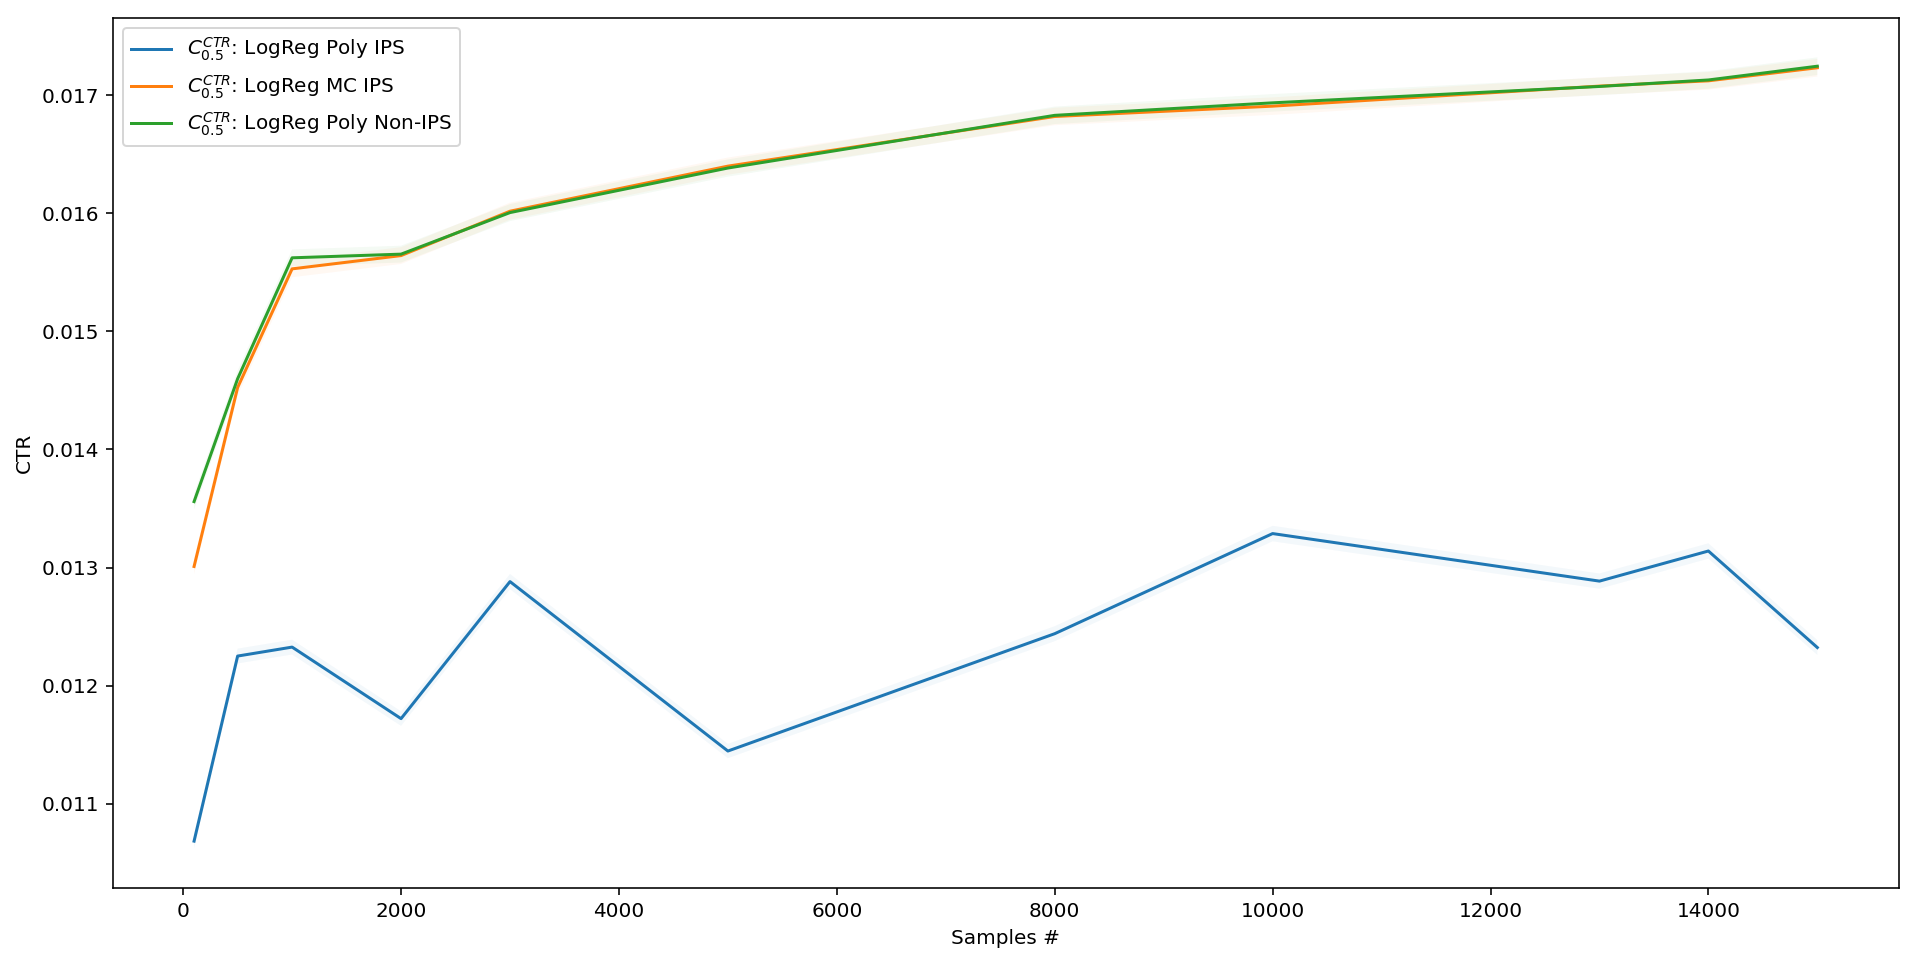

In [5]:
plot_agent_stats(agent_stats01)

## _Non-Uniform_ Data Set

On the contrary to the previous case, a _**non**-uniform_ data set will be used.
The data are obtained via using _Organic User Event Counter_ _`Agent`_, i.e. the _`Agent`_ that selects the most popular _`Product`_ (most frequently viewed in _Organic_ _`Events`_) with the highest probability.

In [6]:
from reco_gym import Configuration
from agents import OrganicUserEventCounterAgent, organic_user_count_args

Gathering statistics...

In [7]:
agent_stats02 = gather_agent_stats(
    env,
    std_env_args,
    {
        'num_products': 10,
        'number_of_flips': 5,
        'agent': OrganicUserEventCounterAgent(Configuration({
            **organic_user_count_args,
            **std_env_args,
            'select_randomly': True,
        })),
    },
    agent_inits,
    TrainingDataSamples,
    TestingDataSamples,
    StatEpochs,
    StatEpochsNewRandomSeed
)

Agent: LogReg Poly IPS
Start: Num of Offline Users: 100
Start: Agent Training #1
Start: Agent Training #0
Start: Agent Training #2
Start: Agent Training #5
Start: Agent Training #3
Start: Agent Training #6
Start: Agent Training #4
Start: Agent Training #9
Start: Agent Training #7
Start: Agent Training #8
Start: Agent Testing #0
Start: Agent Testing #1
Start: Agent Testing #7
Start: Agent Testing #2
Start: Agent Testing #9
Start: Agent Testing #8
Start: Agent Testing #6
Start: Agent Testing #4
Start: Agent Testing #5
Start: Agent Testing #3
End: Agent Testing #9 (1813.7723026275635s)
End: Agent Testing #4 (1813.8709454536438s)
End: Agent Testing #7 (1820.7050805091858s)
End: Agent Testing #3 (1823.6067461967468s)
End: Agent Testing #0 (1825.1219041347504s)
End: Agent Testing #1 (1827.6316294670105s)
End: Agent Testing #8 (1830.7078349590302s)
End: Agent Testing #6 (1830.833916425705s)
End: Agent Testing #5 (1913.545268535614s)
End: Agent Testing #2 (2159.7736790180206s)
End: Num of Offl

Start: Agent Training #1
Start: Agent Training #0
Start: Agent Training #6
Start: Agent Training #9
Start: Agent Training #2
Start: Agent Training #7
Start: Agent Training #3
Start: Agent Training #8
Start: Agent Training #5
Start: Agent Testing #6
Start: Agent Testing #9
Start: Agent Testing #4
Start: Agent Testing #0
Start: Agent Testing #8
Start: Agent Testing #5
Start: Agent Testing #3
Start: Agent Testing #2
Start: Agent Testing #7
Start: Agent Testing #1
End: Agent Testing #6 (2115.462606906891s)
End: Agent Testing #3 (2136.6778144836426s)
End: Agent Testing #7 (2145.4818530082703s)
End: Agent Testing #8 (2150.3092918395996s)
End: Agent Testing #4 (2153.4228398799896s)
End: Agent Testing #9 (2190.352920293808s)
End: Agent Testing #1 (2193.138825893402s)
End: Agent Testing #2 (2199.3328437805176s)
End: Agent Testing #5 (2202.411693572998s)
End: Agent Testing #0 (2283.4260547161102s)
End: Num of Offline Users: 13000 (2283.7597374916077s)
Start: Num of Offline Users: 14000
Start: Ag

Start: Agent Training #5
Start: Agent Training #8
Start: Agent Training #1
Start: Agent Training #9
Start: Agent Training #4
Start: Agent Testing #1
Start: Agent Testing #4
Start: Agent Testing #3
Start: Agent Testing #6
Start: Agent Testing #7
Start: Agent Testing #8
Start: Agent Testing #9
Start: Agent Testing #5
Start: Agent Testing #2
Start: Agent Testing #0
End: Agent Testing #0 (928.8917388916016s)
End: Agent Testing #6 (940.6506054401398s)
End: Agent Testing #8 (943.4845898151398s)
End: Agent Testing #7 (974.2318270206451s)
End: Agent Testing #1 (979.4809801578522s)
End: Agent Testing #9 (1007.5585577487946s)
End: Agent Testing #3 (1019.1315574645996s)
End: Agent Testing #4 (1021.4666712284088s)
End: Agent Testing #2 (1023.1448516845703s)
End: Agent Testing #5 (1028.4470613002777s)
End: Num of Offline Users: 5000 (1028.6772103309631s)
Start: Num of Offline Users: 8000
Start: Agent Training #1
Start: Agent Training #0
Start: Agent Training #5
Start: Agent Training #2
Start: Agent

Start: Agent Training #6
Start: Agent Training #0
Start: Agent Training #4
Start: Agent Testing #7
Start: Agent Testing #4
Start: Agent Testing #3
Start: Agent Testing #5
Start: Agent Testing #1
Start: Agent Testing #9
Start: Agent Testing #2
Start: Agent Testing #6
Start: Agent Testing #8
Start: Agent Testing #0
End: Agent Testing #6 (2140.4729351997375s)
End: Agent Testing #3 (2145.512747526169s)
End: Agent Testing #8 (2147.2771229743958s)
End: Agent Testing #4 (2154.223093509674s)
End: Agent Testing #9 (2154.467281103134s)
End: Agent Testing #1 (2165.577509880066s)
End: Agent Testing #5 (2172.382755756378s)
End: Agent Testing #7 (2177.604429244995s)
End: Agent Testing #2 (2267.660086631775s)
End: Agent Testing #0 (2412.509561777115s)
End: Num of Offline Users: 1000 (2412.7784683704376s)
Start: Num of Offline Users: 2000
Start: Agent Training #0
Start: Agent Training #3
Start: Agent Training #1
Start: Agent Training #6
Start: Agent Training #9
Start: Agent Training #8
Start: Agent Tr

Start: Agent Testing #6
Start: Agent Testing #1
Start: Agent Testing #7
Start: Agent Testing #2
Start: Agent Testing #5
Start: Agent Testing #4
Start: Agent Testing #8
Start: Agent Testing #3
End: Agent Testing #0 (3292.8331706523895s)
End: Agent Testing #5 (3319.692814350128s)
End: Agent Testing #1 (3354.881326675415s)
End: Agent Testing #2 (3364.0059068202972s)
End: Agent Testing #9 (3367.354086637497s)
End: Agent Testing #8 (3367.4186837673187s)
End: Agent Testing #4 (3415.7915346622467s)
End: Agent Testing #3 (3416.06520152092s)
End: Agent Testing #7 (3451.773679256439s)
End: Agent Testing #6 (3469.261509656906s)
End: Num of Offline Users: 15000 (3469.5100593566895s)


Plotting results...

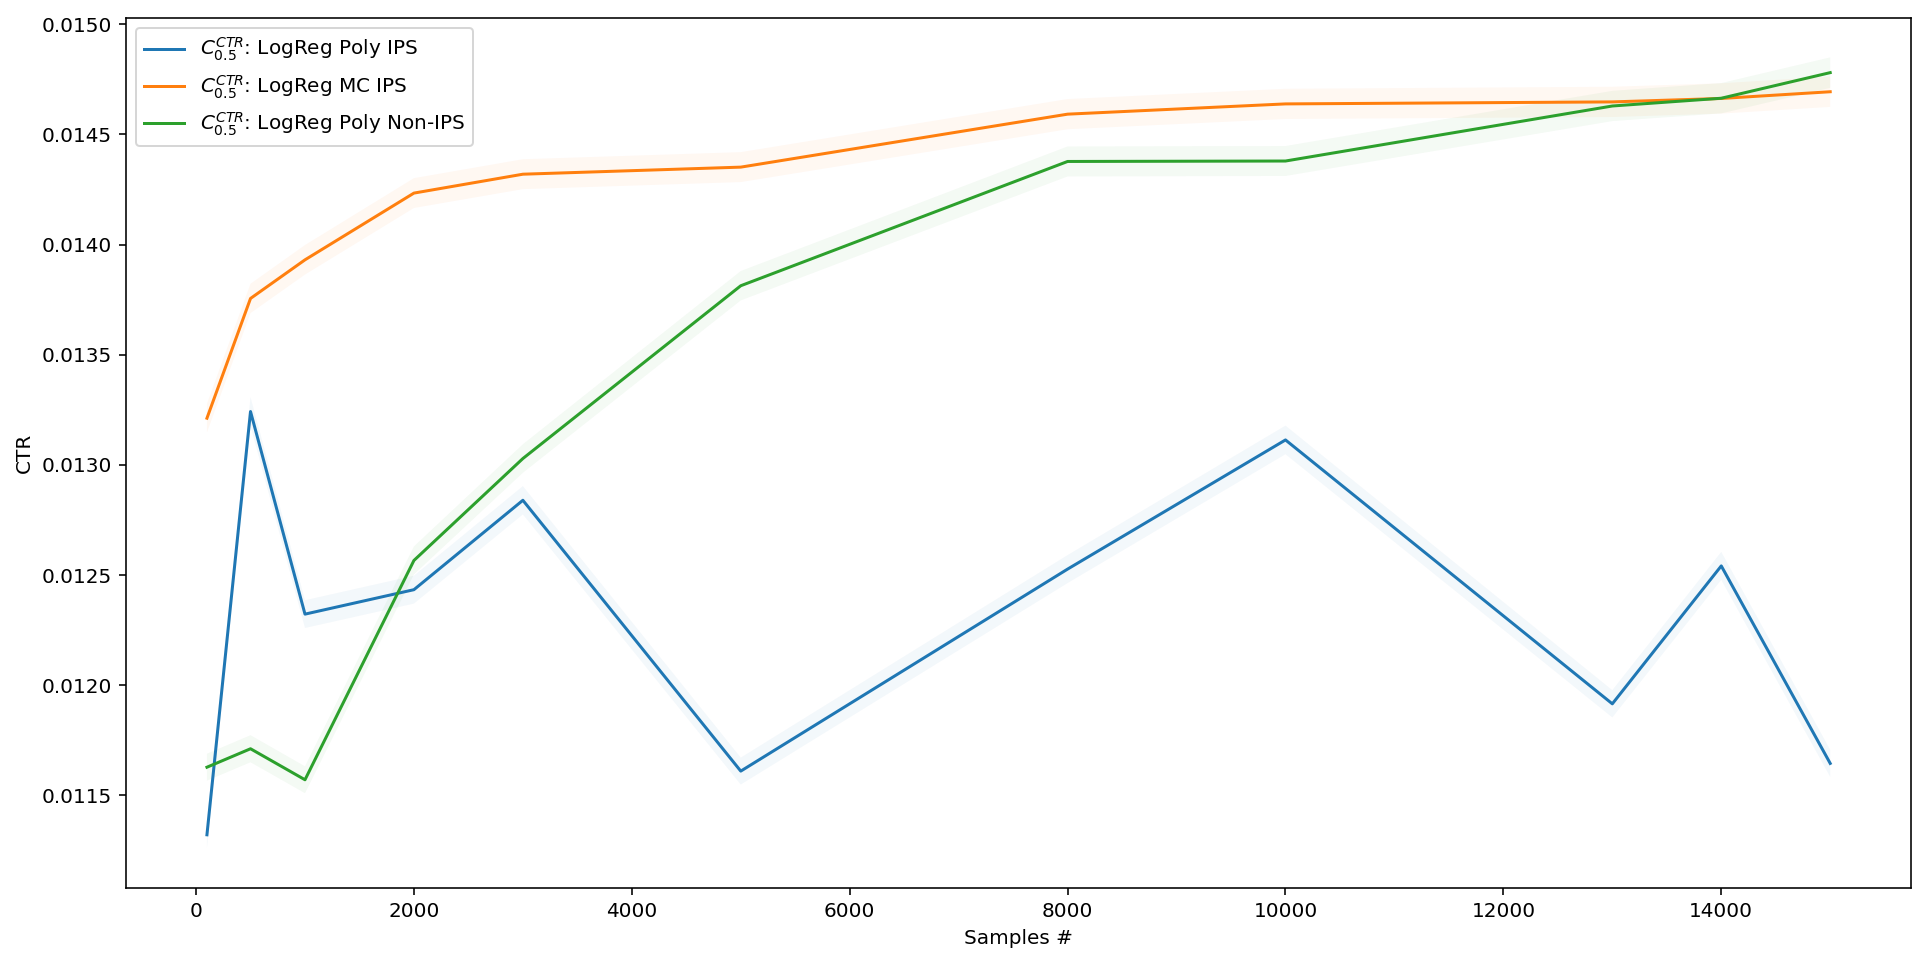

In [8]:
plot_agent_stats(agent_stats02)

Finally, let's analyse the behaviour of _Logistic Regression Multi-Class & IPS_ _`Agent`_ in a more fine-grained scale of training data.

# Resolution

* _**Uniform**_ Data Set
    * _Logistic Regression_ based on clicks _**only**_ (Multi-Class with _Inverse Propensity Score_) _**never**_ reaches the performance of _Logistic Regression_ with a polynomial feature set.
    * _Logistic Regression_ with a polynomial feature set starts providing a better result (_Click-Through Rate_) with much smaller training data set.
* _**Non-Unifor**_ Data Set
    * _Logistic Regression_ with a polynomial feature set _**still**_ outperforms _Logistic Regression_ _**with**_ _IPS_.
    

Also, in that study, it is quite evident that for _Logistic Regression_ there is a strong correlation: the more significant volume of training data is, the better _Click-Through Rare_ is.